# Estimating AirBnB Prices

<img src="images/airbnb.jpg"/>

## Background Information on the Dataset

AirBnB is an online marketplace that allows members to offer or arrange lodging (primarily homestays) or tourism experiences. There are millions of listings across in cities across the world, such as London, Paris, and New York. In this problem, we would like to understand the factors that influence the price of a listing.

To derive insights and answer these questions, we take a look at listing data released by AirBnB (downloaded in September 2018 from http://insideairbnb.com/get-the-data.html). We specifically focus on apartments listed in six representative neighborhoods of Boston, MA. Our data has a total of 12 columns and 1693 observations, split across a training set (1187 observations) and a test set (506 observations). Each observation corresponds to a different listing.

    Training data: airbnb-train.csv 

    Test data: airbnb-test.csv

### Here is a detailed description of the variables:

    id: A number that uniquely identifies the listing.

    host_is_superhost: Whether a host is a “superhost,” meaning they satisfy AirBnB’s criteria for high-quality listings, high response rate, and reliability.

    host_identity_verified: Whether the host has verified their identity with AirBnB, which is intended to promote trust between hosts and guests. neighborhood: The neighborhood that the listing is located in (Allston, Back Bay, Beacon Hill, Brighton Downtown, or South End).

    room_type: The type of room provided in the listing (Entire home/apt, Private room, or Shared room).

    accommodates: The number of people that the listing can accommodate.
    
    bathrooms: The number of bathrooms in the listing.

    bedrooms: The number of bedrooms in the listing.

    beds: The number of beds in the listing. price: The price to stay in the listing for one night.

    logprice: The natural logarithm of the price variable.

    logacc: The natural logarithm of the accommodates variable.

### Exploratory Data Analysis
Load *airbnb-train.csv* into a data frame called train.

In [1]:
# Read in the  training dataset

train = read.csv("data/airbnb-train.csv")

head(train)

,id,host_is_superhost,host_identity_verified,neighborhood,room_type,accommodates,bathrooms,bedrooms,beds,price,logprice,logacc
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,8792,0,0,Downtown,Entirehome/apt,2,1,1,1,154,5.036953,0.6931472
2,10810,0,0,Allston,Entirehome/apt,5,1,2,4,250,5.521461,1.6094379
3,10811,0,0,BackBay,Entirehome/apt,3,1,0,2,189,5.241747,1.0986123
4,22212,0,1,BackBay,Entirehome/apt,4,1,2,2,285,5.652489,1.3862944
5,28150,0,1,BackBay,Entirehome/apt,2,1,1,1,184,5.214936,0.6931472
6,47722,0,1,BackBay,Privateroom,2,1,1,1,479,6.171701,0.6931472


In [2]:
str(train)

'data.frame':	1187 obs. of  12 variables:
 $ id                    : int  8792 10810 10811 22212 28150 47722 60356 170715 307571 311240 ...
 $ host_is_superhost     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ host_identity_verified: int  0 0 0 1 1 1 0 0 0 1 ...
 $ neighborhood          : Factor w/ 6 levels "Allston","BackBay",..: 5 1 2 2 2 2 5 2 3 2 ...
 $ room_type             : Factor w/ 3 levels "Entirehome/apt",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ accommodates          : int  2 5 3 4 2 2 2 4 2 2 ...
 $ bathrooms             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ bedrooms              : int  1 2 0 2 1 1 1 1 1 0 ...
 $ beds                  : int  1 4 2 2 1 1 1 2 1 1 ...
 $ price                 : int  154 250 189 285 184 479 175 200 150 185 ...
 $ logprice              : num  5.04 5.52 5.24 5.65 5.21 ...
 $ logacc                : num  0.693 1.609 1.099 1.386 0.693 ...


**How many rows are in the training dataset?**

In [3]:
# Calculate the number of rows in the training dataset
nrow(train)

[1] 1187

**What is the mean price in the training dataset?**

In [4]:
# Find the mean price in the training set
mtp = mean(train$price)
round(mtp,2)

[1] 212.09

**What is the maximum price in the training dataset?**

In [5]:
# Find the max price in the training set
maxp = max(train$price)
round(maxp,2)

[1] 999

**What is the neighborhood with the highest number of listings in the training dataset?**

In [6]:
# Tabulate the number of listings for each neighborhood
table(train$neighborhood)


   Allston    BackBay BeaconHill   Brighton   Downtown   SouthEnd 
       176        279        155        135        208        234 

In [7]:
max(table(train$neighborhood))

[1] 279

Answer: BackBay.

**What is the neighborhood with the highest average price in the training dataset?**

In [8]:
# Tabulate the neighborhood with the highest average price in the training dataset
tapply(train$price, train$neighborhood, mean)

Allston    BackBay BeaconHill   Brighton   Downtown   SouthEnd 
  142.7330   248.5699   187.2903   113.8444   289.4663   225.0726

Answer: Downtown.

### Simple Linear Regression
For the rest of this problem, we will be working with log(price) and log(accommodates), which helps us manage the outliers with excessively large prices and accommodations. The values of log(price) and log(accommodates) are found in the columns logprice and logacc, respectively.

Load *airbnb-test.csv* into a data frame called test.

In [9]:
# Load testing dataset
test = read.csv("data/airbnb-test.csv")

head(test)

,id,host_is_superhost,host_identity_verified,neighborhood,room_type,accommodates,bathrooms,bedrooms,beds,price,logprice,logacc
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,8789,0,0,Downtown,Entirehome/apt,2,1,1,1,99,4.595120,0.6931472
2,10809,0,0,Allston,Privateroom,4,0,1,2,100,4.605170,1.3862944
3,10813,0,0,BackBay,Entirehome/apt,3,1,0,1,190,5.247024,1.0986123
4,95453,1,0,Allston,Entirehome/apt,2,1,1,1,175,5.164786,0.6931472
5,217498,1,1,Brighton,Privateroom,2,1,1,1,99,4.595120,0.6931472
6,318050,1,1,SouthEnd,Privateroom,2,1,1,1,99,4.595120,0.6931472


In [10]:
str(test)

'data.frame':	506 obs. of  12 variables:
 $ id                    : int  8789 10809 10813 95453 217498 318050 851927 1055627 1214214 1860279 ...
 $ host_is_superhost     : int  0 0 0 1 1 1 1 0 0 0 ...
 $ host_identity_verified: int  0 0 0 0 1 1 1 0 1 1 ...
 $ neighborhood          : Factor w/ 6 levels "Allston","BackBay",..: 5 1 2 1 4 6 6 3 6 2 ...
 $ room_type             : Factor w/ 3 levels "Entirehome/apt",..: 1 2 1 1 2 2 1 1 1 1 ...
 $ accommodates          : int  2 4 3 2 2 2 1 3 3 2 ...
 $ bathrooms             : num  1 0 1 1 1 1 1 1 2 1 ...
 $ bedrooms              : int  1 1 0 1 1 1 1 1 2 1 ...
 $ beds                  : int  1 2 1 1 1 1 1 1 2 1 ...
 $ price                 : int  99 100 190 175 99 99 150 125 450 285 ...
 $ logprice              : num  4.6 4.61 5.25 5.16 4.6 ...
 $ logacc                : num  0.693 1.386 1.099 0.693 0.693 ...


**What is our “baseline” linear regression model?**

Answer: Our baseline model is the mean log(price) of the training set.

**What is the value of log(price) that our baseline model predicts?**

In [11]:
# Baseline model prediction
baseline = mean(train$logprice)
round(baseline,4)

[1] 5.1581

**What is the correlation between log(price) and log(accommodates) in the training set?**

In [12]:
# Compute the correlation between log(price) and log(accomodates)
round(cor(train$logacc, train$logprice),4)

[1] 0.5366

### Create a linear model that predicts log(price) using log(accommodates). 
**What is the coefficient of log(accommodates)?**

In [13]:
# Linear Regression Model with logacc
lreg1 = lm(logprice ~ logacc, data = train)

# Summary of Linear Regression Model
summary(lreg1)


Call:
lm(formula = logprice ~ logacc, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3773 -0.3531  0.0431  0.3902  2.1317 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.41943    0.03738  118.22   <2e-16 ***
logacc       0.70348    0.03213   21.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5544 on 1185 degrees of freedom
Multiple R-squared:  0.288,	Adjusted R-squared:  0.2874 
F-statistic: 479.3 on 1 and 1185 DF,  p-value: < 2.2e-16


Answer: 0.70348 is the coefficient of log(accommodates).

### What is the R2 on the test set?

In [14]:
# Make predictions using the Linear Regression Model on the test set
predTest = predict(lreg1, newdata = test)

In [15]:
# SSE
SSE = sum((predTest - test$logprice)^2)
SSE

[1] 148.3648

In [16]:
# RMSE
RMSE = sqrt(mean((predTest - test$logprice)^2))
RMSE

[1] 0.5414897

In [17]:
# Baseline
baseline = mean(train$logprice)
baseline

[1] 5.158113

In [18]:
# SSE of baseline model on testing set
SSEb = sum((baseline - test$logprice)^2)
SSEb

[1] 210.6516

In [19]:
# R^2
RsquaredLRl = 1 - SSE/SSEb
paste("R^2 Linear Regression (logacc):",round(RsquaredLRl,4))

[1] "R^2 Linear Regression (logacc): 0.2957"

### Adding More Variables
As good practice, it is always helpful to first check for multicollinearity before running larger models.

Examine the correlation between the following variables:

In [20]:
hishiv = cor(train$host_is_superhost, train$host_identity_verified)
round(hishiv,4)

[1] 0.1735

In [21]:
hisber = cor(train$host_is_superhost, train$bedrooms)
round(hisber,4)

[1] -0.0151

In [22]:
berloga = cor(train$bedrooms, train$logacc)
round(berloga,4)

[1] 0.6515

In [23]:
bedloga = cor(train$beds, train$logacc)
round(bedloga,4)

[1] 0.7782

In [24]:
batloga = cor(train$bathrooms, train$logacc)
round(batloga,4)

[1] 0.3859

In [25]:
bedbat = cor(train$bedrooms, train$bathrooms)
round(bedbat,4)

[1] 0.5155

In [26]:
berbe = cor(train$bedrooms, train$beds)
round(berbe,4)

[1] 0.7245

Create a linear model that predicts log(price) using the following variables:

log(accommodates), host_identity_verified, host_is_superhost, bedrooms, bathrooms, room_type, and neighborhood.

We have removed beds because of concerns about multicollinearity.

In [27]:
# Create Linear Regression Model with:
# log(accommodates), host_identity_verified, host_is_superhost, bedrooms, bathrooms, room_type, and neighborhood

lreg2 = lm(logprice ~ logacc + host_identity_verified + host_is_superhost + bedrooms + bathrooms + room_type + 
                                                                                                   neighborhood, data = train)

# Summary of Linear Regression Model
summary(lreg2)


Call:
lm(formula = logprice ~ logacc + host_identity_verified + host_is_superhost + 
    bedrooms + bathrooms + room_type + neighborhood, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85657 -0.24703  0.01275  0.26600  2.10264 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.45230    0.06094  73.057  < 2e-16 ***
logacc                  0.04371    0.03963   1.103 0.270240    
host_identity_verified -0.09107    0.02632  -3.460 0.000559 ***
host_is_superhost      -0.09784    0.03568  -2.742 0.006190 ** 
bedrooms                0.21591    0.02205   9.791  < 2e-16 ***
bathrooms               0.19670    0.03696   5.323 1.22e-07 ***
room_typePrivateroom   -0.64155    0.04028 -15.926  < 2e-16 ***
room_typeSharedroom    -0.82158    0.15035  -5.464 5.67e-08 ***
neighborhoodBackBay     0.52385    0.04311  12.151  < 2e-16 ***
neighborhoodBeaconHill  0.31858    0.04886   6.520 1.04e-10 ***
neighborhoodBrighton   -

**What is the value of the intercept?**

Answer: 4.45230 is the value of the intercept.

### What is the R2 on the test set?

In [28]:
# Make predictions using the Linear Regression Model (various variables) on the test set
predTest2 = predict(lreg2, newdata = test)

In [29]:
# SSE
SSE = sum((predTest2 - test$logprice)^2)
SSE

[1] 82.72458

In [30]:
# RMSE
RMSE = sqrt(mean((predTest2 - test$logprice)^2))
RMSE

[1] 0.4043356

In [31]:
# Baseline
baseline = mean(train$logprice)
baseline

[1] 5.158113

In [32]:
# SSE of baseline model on testing set
SSEb = sum((baseline - test$logprice)^2)
SSEb

[1] 210.6516

In [33]:
# R^2
RsquaredLRv = 1 - SSE/SSEb
paste("R^2 Linear Regression (various variables):",round(RsquaredLRv,4))

[1] "R^2 Linear Regression (various variables): 0.6073"

### Interpreting Linear Regression
**Which of the following variables are significant at a level of 0.001 (p-value below 0.001)?**

Answer: 

    host_identity_verified
    bedrooms
    bathrooms
    room_typePrivateroom
    room_typeSharedroom
    neighborhoodBackBay
    neighborhoodBeaconHill   
    neighborhoodDowntown
    neighborhoodSouthEnd

**How would you interpret the coefficient of “host_is_superhost”?**

Answer: All else being equal, being a superhost is associated with a 0.09784 decrease in log(price).

**Which of the three room types will be predicted to have the highest price, all else being equal?**

Answer: Entire home/apt.

**How would you interpret the coefficient of “neighborhoodBackBay”?**

Answer: Compared to a listing that is in Allston but is otherwise identical, a Back Bay apartment will have a higher log(price) by 0.52385.

### CART and Random Forest
Create a simple CART model using bedrooms to predict log(price), with a cp value of 0.001.

In [34]:
library(rpart)
library(rpart.plot)

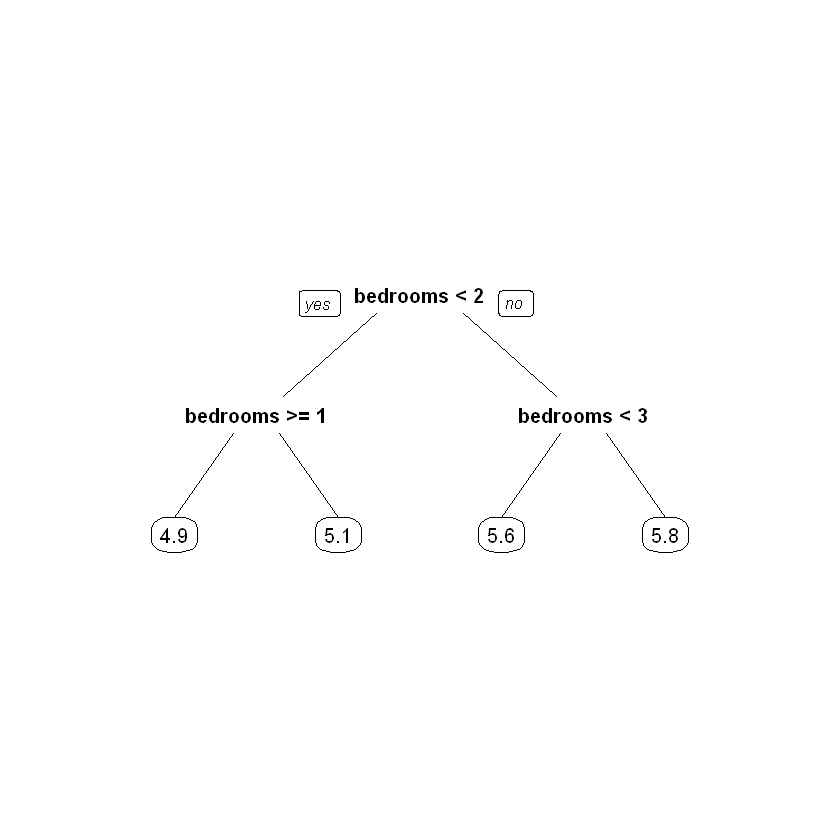

In [35]:
# Classification and Regression Trees (CART) - 1

CARTmodel1 = rpart(logprice ~ bedrooms, data = train, cp =0.001)

prp(CARTmodel1)

**What value of log(price) would this model predict for a two-bedroom listing?**

Answer: By CART tree, **5.6**.

**What is the R^2 of this model on the test set?**

In [36]:
# Make predictions
predTestC1 = predict(CARTmodel1, newdata = test)

In [37]:
# SSE
SSE = sum((predTestC1 - test$logprice)^2)
SSE

[1] 163.5809

In [38]:
# RMSE
RMSE = sqrt(mean((predTestC1 - test$logprice)^2))
RMSE

[1] 0.5685793

In [39]:
# Baseline
baseline = mean(train$logprice)
baseline

[1] 5.158113

In [40]:
# SSE of baseline model on testing set
SSEb = sum((baseline - test$logprice)^2)
SSEb

[1] 210.6516

In [41]:
# R^2
RsquaredC1 = 1 - SSE/SSEb
paste("R^2 CART (bedrooms):",round(RsquaredC1,4))

[1] "R^2 CART (bedrooms): 0.2235"

### Classification and Regression Trees (CART) - 2

Create a CART model that predicts log(price) using the following variables: log(accommodates), host_identity_verified, host_is_superhost, bedrooms, bathrooms, room_type, and neighborhood. Again, use cp = 0.001.

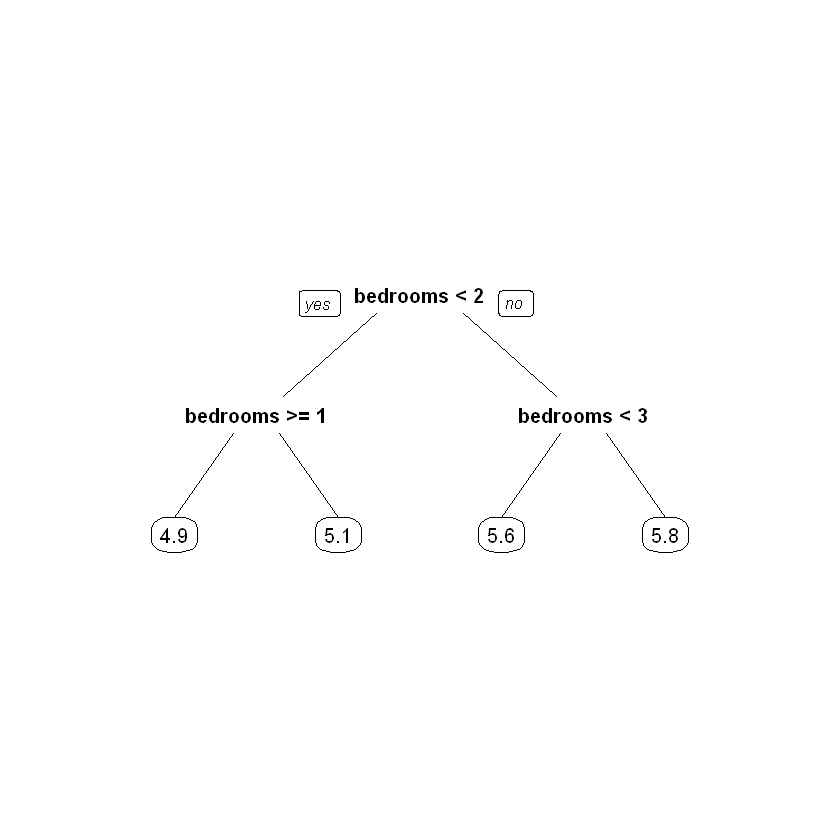

In [42]:
# Classification and Regression Trees (CART) - 2

CARTmodel2 = rpart(logprice ~ logacc + host_identity_verified + host_is_superhost + bedrooms + bathrooms + room_type + 
                              neighborhood, data = train, cp =0.001)

prp(CARTmodel1)

### What is the R^2 of this new model on the test set?

In [43]:
# Make predictions
predTestC2 = predict(CARTmodel2, newdata = test)

In [44]:
# SSE
SSE = sum((predTestC2 - test$logprice)^2)
SSE

[1] 82.47188

In [45]:
# RMSE
RMSE = sqrt(mean((predTestC2 - test$logprice)^2))
RMSE

[1] 0.4037176

In [46]:
# Baseline
baseline = mean(train$logprice)
baseline

[1] 5.158113

In [47]:
# SSE of baseline model on testing set
SSEb = sum((baseline - test$logprice)^2)
SSEb

[1] 210.6516

In [48]:
# R^2
RsquaredC2 = 1 - SSE/SSEb
paste("R^2 CART (various variables):",round(RsquaredC2,4))

[1] "R^2 CART (various variables): 0.6085"

### Random Forest

Create a random forest model that predicts log(price) using the same variables as the CART model, with nodesize = 20 and ntree = 200. Set the random seed to 1.

In [49]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [50]:
# Implement Random Forest Model

set.seed(1)

RFmodel1 = randomForest(logprice ~ logacc + host_identity_verified + host_is_superhost + bedrooms + bathrooms + room_type + 
                                   neighborhood, data = train, nodesize = 20, ntree = 200)

**What is the R^2 of this new model on the test set?**

In [51]:
# Make predictions
predTestRF = predict(RFmodel1, newdata = test)

In [52]:
# SSE
SSE = sum((predTestRF - test$logprice)^2)
SSE

[1] 74.71968

In [53]:
# RMSE
RMSE = sqrt(mean((predTestRF - test$logprice)^2))
RMSE

[1] 0.3842751

In [54]:
# Baseline
baseline = mean(train$logprice)
baseline

[1] 5.158113

In [55]:
# SSE of baseline model on testing set
SSEb = sum((baseline - test$logprice)^2)
SSEb

[1] 210.6516

In [56]:
# R^2
RsquaredRF = 1 - SSE/SSEb
paste("R^2 Random Forest:",round(RsquaredRF,4))

[1] "R^2 Random Forest: 0.6453"

### Comparison between models

In [57]:
paste("R^2 Linear Regression (logacc):",round(RsquaredLRl,4))

paste("R^2 Linear Regression (various variables):",round(RsquaredLRv,4))

paste("R^2 CART (bedrooms):",round(RsquaredC1,4))

paste("R^2 CART (various variables):",round(RsquaredC2,4))

paste("R^2 Random Forest:",round(RsquaredRF,4))

[1] "R^2 Linear Regression (logacc): 0.2957"

[1] "R^2 Linear Regression (various variables): 0.6073"

[1] "R^2 CART (bedrooms): 0.2235"

[1] "R^2 CART (various variables): 0.6085"

[1] "R^2 Random Forest: 0.6453"